In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("D:\LP3\ML_Assignments\Datasets\sales_data_sample.csv", encoding='latin-1')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [3]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [4]:
df = df[['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'STATUS', 'PRODUCTLINE', 'MSRP', 'DEALSIZE']]

In [5]:
df.dtypes

QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
STATUS              object
PRODUCTLINE         object
MSRP                 int64
DEALSIZE            object
dtype: object

In [6]:
print(f"STATUS Column unique values - {df['STATUS'].unique()}")
print(f"PRODUCTLINE Column unique values - {df['PRODUCTLINE'].unique()}")
print(f"DEALSIZE Column unique values - {df['DEALSIZE'].unique()}")


STATUS Column unique values - ['Shipped' 'Disputed' 'In Process' 'Cancelled' 'On Hold' 'Resolved']
PRODUCTLINE Column unique values - ['Motorcycles' 'Classic Cars' 'Trucks and Buses' 'Vintage Cars' 'Planes'
 'Ships' 'Trains']
DEALSIZE Column unique values - ['Small' 'Medium' 'Large']


In [7]:
status_dict = {'Shipped':0, 'Disputed':1, 'In Process':2, 'Cancelled':3, 'On Hold':4, 'Resolved':5}
prod_line_dict = {'Motorcycles':0, 'Classic Cars':1, 'Trucks and Buses':2, 'Vintage Cars':3, 'Planes':4,
 'Ships':5, 'Trains':6}
dealsize_dict = {'Small':0, 'Medium':1, 'Large':2}

df['STATUS'] = df['STATUS'].map(status_dict)
df['PRODUCTLINE'] = df['PRODUCTLINE'].map(prod_line_dict)
df['DEALSIZE'] = df['DEALSIZE'].map(dealsize_dict)


C:\Users\DELL\AppData\Local\Temp\ipykernel_24728\1007269440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STATUS'] = df['STATUS'].map(status_dict)
C:\Users\DELL\AppData\Local\Temp\ipykernel_24728\1007269440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PRODUCTLINE'] = df['PRODUCTLINE'].map(prod_line_dict)
C:\Users\DELL\AppData\Local\Temp\ipykernel_24728\1007269440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

## Elbow Method

SSE (Sum of Squared Errors) of each cluster is calculated by SSE(i) = sum of square of error of data points in the i<sup>th</sup> cluster from its centroid. SSE (total) = Sum of SSE(i) for all K clusters.

After plotting SSE against K (number of clusters), an elbow shape is created.

<img src="elbow_technique.png" alt="Elbow Technique" width="600"/>

A good K value would be at the elbow of the graph, K=4 in this case.

**Note:** *Inertia* is the measure of how well a dataset has been clustered by K-Means. **It is the same as SSE**. 


In [8]:
sse = []

for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(df)
    sse.append(model.inertia_)


<AxesSubplot:>

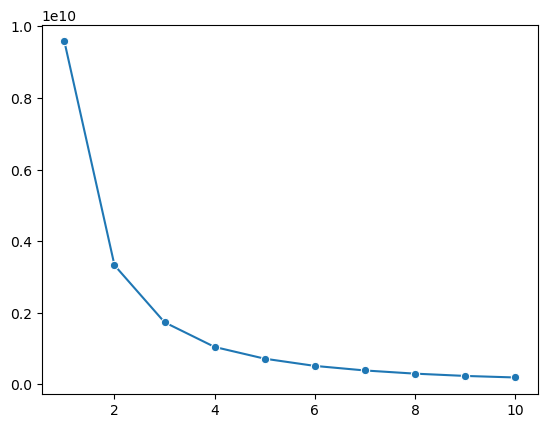

In [9]:
sns.lineplot(x=range(1, 11), y=sse, marker='o')

In [10]:
# Optimal value of K is 3
K=3
model = KMeans(n_clusters=K)
df['Cluster'] = model.fit_predict(df)    # new column for cluster no.
df


C:\Users\DELL\AppData\Local\Temp\ipykernel_24728\3889470029.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = model.fit_predict(df)    # new column for cluster no.


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,PRODUCTLINE,MSRP,DEALSIZE,Cluster
0,30,95.70,2,2871.00,0,0,95,0,1
1,34,81.35,5,2765.90,0,0,95,0,1
2,41,94.74,2,3884.34,0,0,95,1,0
3,45,83.26,6,3746.70,0,0,95,1,0
4,49,100.00,14,5205.27,0,0,95,1,0
...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,0,5,54,0,1
2819,29,100.00,1,3978.51,0,5,54,1,0
2820,43,100.00,4,5417.57,5,5,54,1,0
2821,34,62.24,1,2116.16,0,5,54,0,1
